# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополнительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайтеЖ ниже будут подсказки, как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [1]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#tf.enable_eager_execution()

2.4.1


In [55]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11493376/11490434 [==============================] - 0s 0us/step


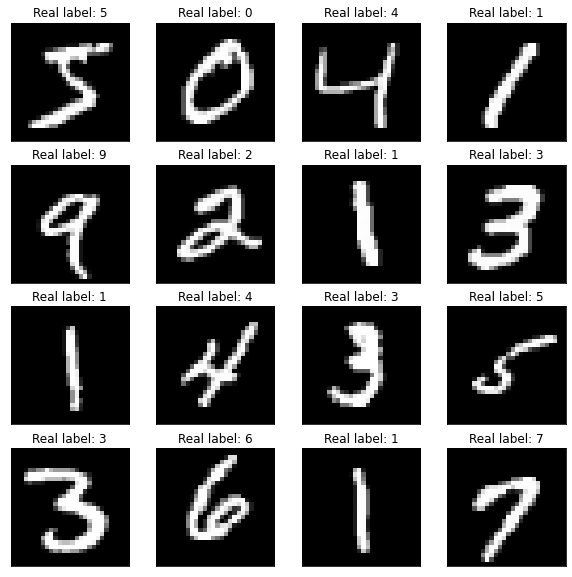

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) 
x_test = x_test.reshape((-1, 28*28))


In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path = Path("/content/drive/My Drive/Skillbox/ML средний/hw3/")
path.mkdir(exist_ok=True, parents=True)
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path = str(path / cpt_filename)

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [52]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(784,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10))
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.15)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=40, verbose=2, validation_data=(x_test, y_test), callbacks=[checkpoint])


Epoch 1/40
1875/1875 - 3s - loss: 0.5874 - accuracy: 0.8339 - val_loss: 0.3733 - val_accuracy: 0.8946

Epoch 00001: val_accuracy improved from -inf to 0.89460, saving model to /content/drive/My Drive/Skillbox/ML средний/hw3/best_checkpoint.hdf5
Epoch 2/40
1875/1875 - 3s - loss: 0.3613 - accuracy: 0.9006 - val_loss: 0.3219 - val_accuracy: 0.9132

Epoch 00002: val_accuracy improved from 0.89460 to 0.91320, saving model to /content/drive/My Drive/Skillbox/ML средний/hw3/best_checkpoint.hdf5
Epoch 3/40
1875/1875 - 3s - loss: 0.3070 - accuracy: 0.9172 - val_loss: 0.2837 - val_accuracy: 0.9252

Epoch 00003: val_accuracy improved from 0.91320 to 0.92520, saving model to /content/drive/My Drive/Skillbox/ML средний/hw3/best_checkpoint.hdf5
Epoch 4/40
1875/1875 - 3s - loss: 0.2647 - accuracy: 0.9285 - val_loss: 0.2725 - val_accuracy: 0.9263

Epoch 00004: val_accuracy improved from 0.92520 to 0.92630, saving model to /content/drive/My Drive/Skillbox/ML средний/hw3/best_checkpoint.hdf5
Epoch 5/40


In [53]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

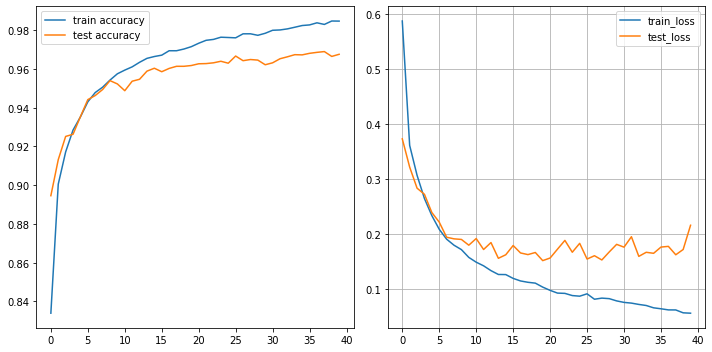

In [56]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [57]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 0s 1ms/step - loss: 0.1626 - accuracy: 0.9690
Accuracy of restored model 96.90%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


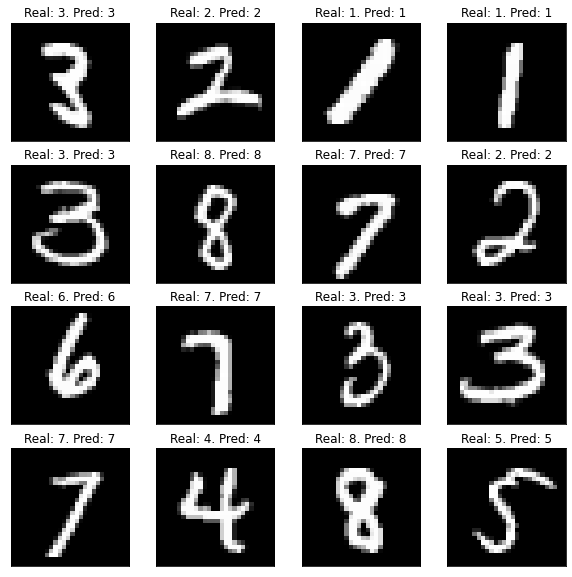

In [58]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])